In [68]:
import re
example = 'Jag är ett barn, och det här är mitt hem. : ?Alltså är det ett barnhem!'

for k in example.split("\n"):
    print(re.sub(r"[^a-zA-ZäöåÄÖÅ0-9.,!;?]+",' ', k))

Jag är ett barn, och det här är mitt hem. ?Alltså är det ett barnhem!


In [2]:
import re

def load_textfile(path):
    # load data
    with open(path,'r') as f:
        file_input=f.read()
    return file_input

def clean_text(text):
    file_out = []
    for n, line in enumerate(text.splitlines()):
        cleaned_line = re.sub(r"[^a-zA-ZäöåÄÖÅ0-9,;?!']+",' ', line.strip())
        if len(cleaned_line)>20:
            file_out.append({'line':n, 'text': cleaned_line.strip()})
    return file_out



In [18]:
# split into sentences
s_eng = "assets/sample_docs_eng/prideandprejudice.txt"
swe = "assets/sample_docs_swe/Melleruds kommun-2020-02-26.txt"
out = clean_text(load_textfile(s_eng))

In [41]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sents = sent_tokenize('\n'.join([l["text"] for l in clean_text(load_textfile(s_eng))]),language='english')
sents_swe = sent_tokenize(load_textfile(swe),language='swedish')


[nltk_data] Downloading package punkt to
[nltk_data]     /mnt/InternalStorage/sidkas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
for sent in sents_swe:
    if len(sent)>100:
        print(sent)
        print("\n")

eviljade i mars 2013 avstyckning i enlighet med ansökan med redogörelsen att
styckningslotten blir en lämplig bostadsfastighet på 6 800 kvadratmeter och restfastigheten
förblir en lämplig jordbruksfastighet.


I januari 2020 inkommer fastighetsägaren med ansökan om bygglov för nybyggnation av
fritidshus med samma placering som tidigare.


Avståndet från fritidshuset till den sydvästra
fastighetsgränsen är cirka 19,30 meter och till den sydöstra cirka 9,50 meter.


Fritidshuset
upptar en byggnadsarea av cirka 30 kvadratmeter och ska inte ha WC och dusch, utan istället
mulltoa inomhus och utedusch.


Analys
Ett förhandsbesked är bindande vid den kommande bygglovsprövningen om ansökan om
bygglov görs inom två år från lagakraftdatum för förhandsbeskedet.


Nu dröjde bygglovsansökan drygt sju år och byggnadsnämnden är således inte bunden av
förhandsbeskedet.


MELLERUDS KOMMUN SAMMANTRÄDESPROTOKOLL
Sammanträdesdatum sida
Byggnadsnämnden 2020-02-26 14
Justerandes sign Utdragsbestyrkande
Allm

In [43]:
import matplotlib.pyplot as plt
import numpy as np
out_len = [len(o) for o in sents_swe]
plt.hist(out_len, bins=100)
plt.show()

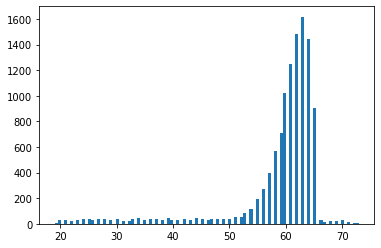

In [19]:
import matplotlib.pyplot as plt
import numpy as np
out_text = [l['text'] for l in out]
out_len = [len(o) for o in out_text]
plt.hist(out_len, bins=100)
plt.show()

In [71]:
from bert_serving.client import BertClient
bc = BertClient(port=5555, port_out=5556)

In [73]:
doc_vecs = bc.encode([example])

In [76]:
vecs = bc.encode(out)

In [77]:
np.shape(vecs)

(653, 768)

In [6]:
sample = "https://haningekommun.ondemand.formpipe.com/committees/committees/kommunstyrelsen/kommunstyrelsen-20667/protocol/protokollpdf-1"

from collections import OrderedDict

sample.split('//')[0]+ '//' + '/'.join(OrderedDict.fromkeys(sample.split('//')[1].split('/')))

'https://haningekommun.ondemand.formpipe.com/committees/kommunstyrelsen/kommunstyrelsen-20667/protocol/protokollpdf-1'

In [6]:
from pdfminer import high_level
import io, re, json, requests


find_full_date = re.compile(r'.*(20[0-9]{2}?[- /]?[0-3]?[0-9][- /]?(?:[0-9]{2})?[0-9]{2})')

def get_meeting_date(text):
    date = find_full_date.findall(text)
    split_date = date[0].split('-')
    year = split_date[0]
    month = split_date[1]
    return year, month, date[0]

def get_meeting_info(text):
    info = ""
    lines = [l for l in text.splitlines() if len(l)>1]
    for i, line in enumerate(lines):
        if 'kl.' in line.lower():
            if i>0: info+=lines[i-1] + '\n'
            info+= line + '\n'+ lines[i+1]
            break
    return info


print('Beginning file download with requests')

url = 'https://haningekommun.ondemand.formpipe.com/committees/kommunstyrelsen/kommunstyrelsen-20667/protocol/protokollpdf-1'
r = requests.get(url)

meta_info = {
    r.url: {
        'status_code': r.status_code,
        'content_type': r.headers['content-type'],
        'content_size': r.headers['content-length'],
        'downloaded_date': r.headers['Date'],
        'path':"/",
        "meeting_date":"",
        "meeting_info":"",
    }
}


if int(r.status_code) <300 and r.headers['content-type'] == "application/pdf":
    text = high_level.extract_text(io.BytesIO(r.content))
    parser = PDFParser(io.BytesIO(r.content))
    document = PDFDocument(parser)
    count = resolve1(document.catalog['Pages'])['Count']

from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1

def extract_pdf(request_content):
    text = high_level.extract_text(io.BytesIO(request_content))
    parser = PDFParser(io.BytesIO(request_content))
    document = PDFDocument(parser)
    page_count = resolve1(document.catalog['Pages'])['Count']
    return text, page_count


Beginning file download with requests
{'Type': /'Pages', 'Count': 13, 'Kids': [<PDFObjRef:4>, <PDFObjRef:15>, <PDFObjRef:22>, <PDFObjRef:25>, <PDFObjRef:28>, <PDFObjRef:34>, <PDFObjRef:37>, <PDFObjRef:43>, <PDFObjRef:46>, <PDFObjRef:49>, <PDFObjRef:52>, <PDFObjRef:55>, <PDFObjRef:58>]}


In [27]:
find_full_date = re.compile(r'.*(20[0-9]{2}?[- /]?[0-3]?[0-9][- /]?(?:[0-9]{2})?[0-9]{2})')
date = find_full_date.findall(text)
split_date = date[0].split('-')
year = split_date[0]
month = split_date[1]

print(year, month, date)



2016 12 ['2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-21', '2017-01-21', '2016-12-19', '2016-12-19', '2015/520', '2016-12-19', '2016/488', '2016-11-09', '2016-11-21', '2016-12-05', '2016-12-14', '2016-12-05', '2016-12-14', '2016-12-05', '2016-11-21', '2016-12-19', '2016-11-09', '2016-11-08', '2016-11-03', '2016-12-19', '2016-12-19', '2016-11-21', '2016-12-19', '2016-12-19', '2016-12-19']


Plats och tid KS-salen Utö
Måndag 2016-12-19, kl. 11.00–11.10
Beslutande


In [34]:
"Kommun".lower()

'kommun'

In [2]:
def get_file_paths(dir_path, filter=".txt"):
    file_paths = []
    for root, dirs, files in os.walk(dir_path):
        for _file in files:
            if _file.endswith(filter):
                file_path = os.path.join(root, _file)
                # file_size = sizeof_fmt(os.path.getsize(file_path))
                # createDate = time.ctime(os.path.getctime(file_path))
                file_paths.append(file_path)
    return file_paths

file_paths = get_file_paths("/mnt/InternalStorage/sidkas/skr/downloaded_pdfs", filter=".pdf")

In [3]:
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1

def extract_pdf(request_content):
    parser = PDFParser(request_content)
    document = PDFDocument(parser)
    page_count = resolve1(document.catalog['Pages'])['Count']
    return page_count

count = [extract_pdf(open(file_path,"rb")) for file_path in file_paths]

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(count, bins=200)
plt.show()

In [8]:
import requests
url = 'https://hjo.se/globalassets/dokument/stab/kansli/protokoll-och-handlingar/kommunfullmaktige/arendelista-med-handlingar/2019/190926-utskick.pdf'
r = requests.get(url)

In [11]:
r.

'OK'

In [4]:
get_pdf_urls = """
    query MyQuery {
        ks_protokoll_schema_file_info(where: {content_type: {_eq: "application/pdf"}}) {
            pdf_url
        }
    }
"""
from gql import gql, Client, AIOHTTPTransport, transport
def get_gql_client():
    transport = AIOHTTPTransport(
        url="http://ec2-13-49-27-116.eu-north-1.compute.amazonaws.com/v1/graphql",
        headers={'Content-Type': 'application/json', 'x-hasura-admin-secret': 'cloud_runner'}
    )

    # Create a GraphQL client using the defined transport
    client = Client(transport=transport, fetch_schema_from_transport=True)
    return client

gql_client = get_gql_client()


In [17]:
response = gql_client.execute_sync(gql(get_pdf_urls))

AssertionError: Only a sync transport can be use. Use 'async with Client(...)' instead

In [16]:
# urls = [ item.get("pdf_url") for item in response["ks_protokoll_schema_file_info"]]
for result in gql_client.subscribe_async(response):
    print(result)

AssertionError: Cannot run client.subscribe if an asyncio loop is running. Use subscribe_async instead.

In [24]:
import os, json, time
from functools import reduce

def sizeof_fmt(num, suffix='B'):
    for unit in ['','K','M','G','T','P','E','Z']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

def get_directory_structure(rootdir):
    """
    Creates a nested dictionary that represents the folder structure of rootdir
    """
    dir = {}
    rootdir = rootdir.rstrip(os.sep)
    start = rootdir.rfind(os.sep) + 1
    for path, dirs, files in os.walk(rootdir):
        folders = path[start:].split(os.sep)
        subdir = {}
        for f in files:
            file_path = os.path.join(path,f)
            subdir[f] = {"size": sizeof_fmt(os.path.getsize(file_path)), "date": time.ctime(os.path.getctime(file_path))}
        parent = reduce(dict.get, folders[:-1], dir)
        parent[folders[-1]] = subdir
    return dir

pathh = "/mnt/InternalStorage/sidkas/project_ks_protocoll/archives"
out = get_directory_structure(pathh)
print(json.dumps(out,indent=4))


{
    "archives": {
        "assets": {
            "download.sh": {
                "size": "355.0B",
                "date": "Mon Nov  2 21:45:51 2020"
            }
        },
        "parse_data": {
            "parse_documents.py": {
                "size": "2.7KB",
                "date": "Wed Oct 28 11:56:19 2020"
            },
            "index_documents.py": {
                "size": "2.0KB",
                "date": "Thu Oct 22 15:18:25 2020"
            },
            "assets": {
                "download.sh": {
                    "size": "355.0B",
                    "date": "Mon Nov  2 21:45:46 2020"
                },
                "assets": {
                    "download.sh": {
                        "size": "355.0B",
                        "date": "Mon Nov  2 21:46:01 2020"
                    }
                }
            }
        },
        "test": {}
    }
}


In [73]:
import numpy as np
import folderstats
import matplotlib.pyplot as plt

path = "/mnt/InternalStorage/sidkas/project_ks_protocoll/new_downloaded_pdfs/"
df = folderstats.folderstats(path, ignore_hidden=True)
df_folders = df[df['folder']]
regions = df_folders.loc[(df_folders.depth==1 )& (df_folders.name!="undefined") ]
kommun  = df_folders.loc[df_folders.depth==2]

print("Total pdf count:", len(df.loc[df.extension=='pdf']), ", regions:",len(regions),", kommuns:", len(kommun))


Total pdf count: 15070 , regions: 20 , kommuns: 124


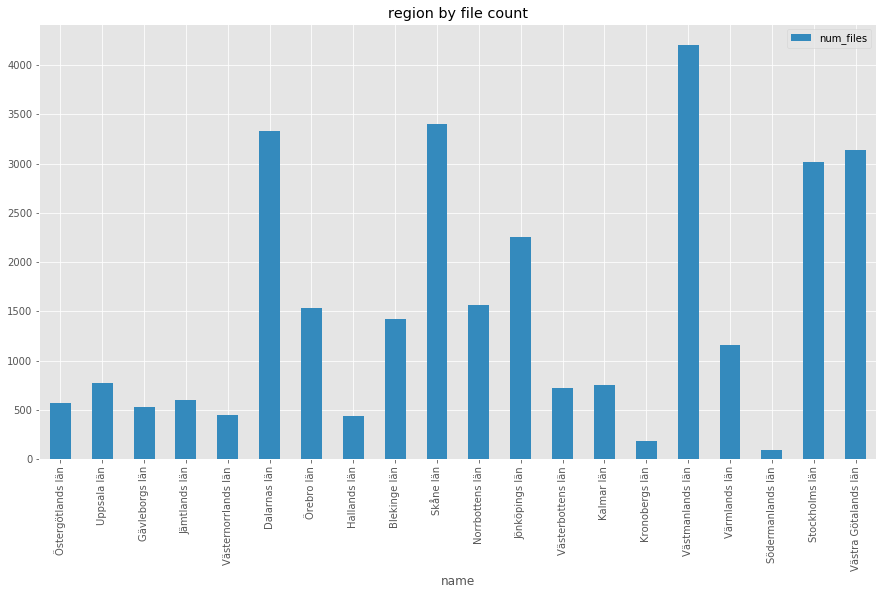

In [74]:
with plt.style.context('ggplot'):
    regions[['name','num_files']].plot(x='name',figsize=(15, 8),
        kind='bar', color='C1', title='region by file count')

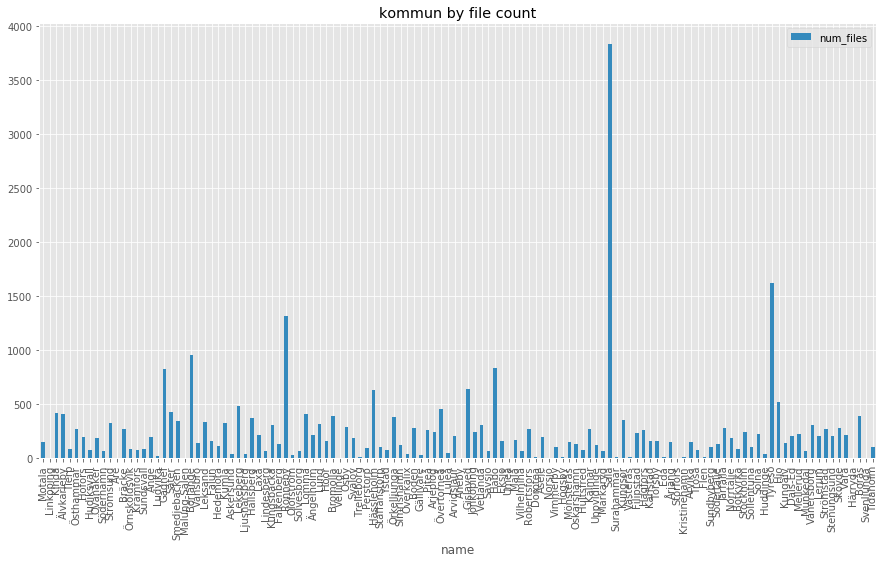

In [75]:
with plt.style.context('ggplot'):
    kommun[['name','num_files']].plot(x='name',figsize=(15, 8),
        kind='bar', color='C1', title='kommun by file count')

In [1]:
!pip install PyMuPDF

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.3 MB 4.9 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
from operator import itemgetter
import fitz
import json


def fonts(doc, granularity=False):
    """Extracts fonts and their usage in PDF documents.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param granularity: also use 'font', 'flags' and 'color' to discriminate text
    :type granularity: bool
    :rtype: [(font_size, count), (font_size, count}], dict
    :return: most used fonts sorted by count, font style information
    """
    styles = {}
    font_counts = {}

    for page in doc:
        blocks = page.getText("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # block contains text
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if granularity:
                            identifier = "{0}_{1}_{2}_{3}".format(s['size'], s['flags'], s['font'], s['color'])
                            styles[identifier] = {'size': s['size'], 'flags': s['flags'], 'font': s['font'],
                                                  'color': s['color']}
                        else:
                            identifier = "{0}".format(s['size'])
                            styles[identifier] = {'size': s['size'], 'font': s['font']}

                        font_counts[identifier] = font_counts.get(identifier, 0) + 1  # count the fonts usage

    font_counts = sorted(font_counts.items(), key=itemgetter(1), reverse=True)

    if len(font_counts) < 1:
        raise ValueError("Zero discriminating fonts found!")

    return font_counts, styles


def font_tags(font_counts, styles):
    """Returns dictionary with font sizes as keys and tags as value.
    :param font_counts: (font_size, count) for all fonts occuring in document
    :type font_counts: list
    :param styles: all styles found in the document
    :type styles: dict
    :rtype: dict
    :return: all element tags based on font-sizes
    """
    p_style = styles[font_counts[0][0]]  # get style for most used font by count (paragraph)
    p_size = p_style['size']  # get the paragraph's size

    # sorting the font sizes high to low, so that we can append the right integer to each tag
    font_sizes = []
    for (font_size, count) in font_counts:
        font_sizes.append(float(font_size))
    font_sizes.sort(reverse=True)

    # aggregating the tags for each font size
    idx = 0
    size_tag = {}
    for size in font_sizes:
        idx += 1
        if size == p_size:
            idx = 0
            size_tag[size] = '<p>'
        if size > p_size:
            size_tag[size] = '<h{0}>'.format(idx)
        elif size < p_size:
            size_tag[size] = '<s{0}>'.format(idx)

    return size_tag


def headers_para(doc, size_tag):
    """Scrapes headers & paragraphs from PDF and return texts with element tags.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param size_tag: textual element tags for each size
    :type size_tag: dict
    :rtype: list
    :return: texts with pre-prended element tags
    """
    header_para = []  # list with headers and paragraphs
    first = True  # boolean operator for first header
    previous_s = {}  # previous span

    for page in doc:
        blocks = page.getText("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # this block contains text

                # REMEMBER: multiple fonts and sizes are possible IN one block

                block_string = ""  # text found in block
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if s['text'].strip():  # removing whitespaces:
                            if first:
                                previous_s = s
                                first = False
                                block_string = size_tag[s['size']] + s['text']
                            else:
                                if s['size'] == previous_s['size']:

                                    if block_string and all((c == "|") for c in block_string):
                                        # block_string only contains pipes
                                        block_string = size_tag[s['size']] + s['text']
                                    if block_string == "":
                                        # new block has started, so append size tag
                                        block_string = size_tag[s['size']] + s['text']
                                    else:  # in the same block, so concatenate strings
                                        block_string += " " + s['text']

                                else:
                                    header_para.append(block_string)
                                    block_string = size_tag[s['size']] + s['text']

                                previous_s = s

                    # new block started, indicating with a pipe
                    block_string += "|"

                header_para.append(block_string)

    return header_para

In [3]:
test_pdf_path = "/mnt/InternalStorage/sidkas/project_ks_protocoll/Kommunstyrelseprotokoll/Blekinge län/Karlshamn/2020/4899 - 2020-09-15.pdf"

# document = 'nationale nederlanden.pdf'
doc = fitz.open(test_pdf_path)

font_counts, styles = fonts(doc, granularity=False)

size_tag = font_tags(font_counts, styles)

elements = headers_para(doc, size_tag)

with open("doc.json", 'w') as json_out:
    json.dump(elements, json_out)
